# Introduction

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling

##  Problem Definition

In a statement,

>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

##  Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

##  Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

##  Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Modeling
We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classisier
3. Random Forest Classifier

# Predicting heart disease using machine learning model

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
#Import all the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from sklearn.inspection import permutation_importance

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

## Load data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Data Exploration

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

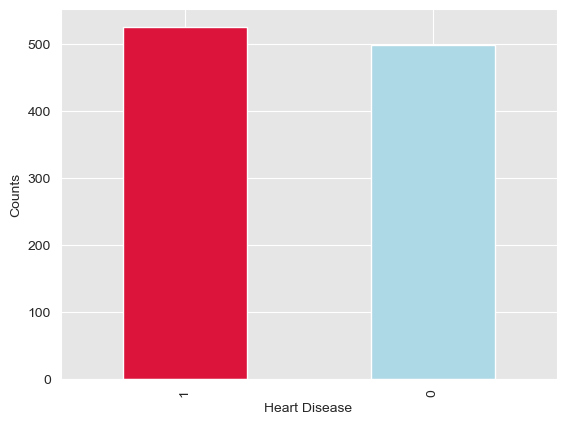

In [6]:
df["target"].value_counts().plot(kind='bar', xlabel='Heart Disease', ylabel='Counts', color=["crimson", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

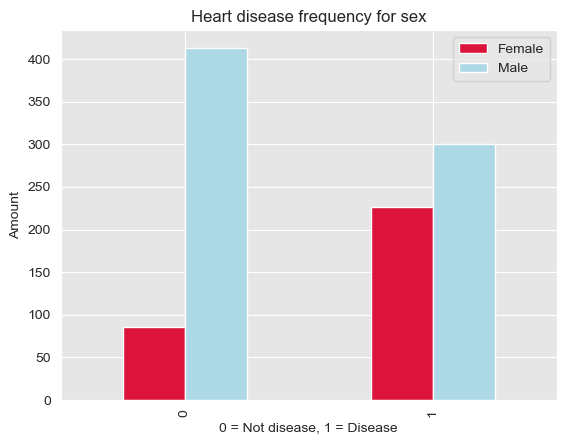

In [11]:
pd.crosstab(df['target'], df['sex']).plot(kind="bar", color=["crimson", "lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = Not disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

We can see that among female, about 75 percent are have heart disease and among male there are more that don't have heart disease.

### Age distribution

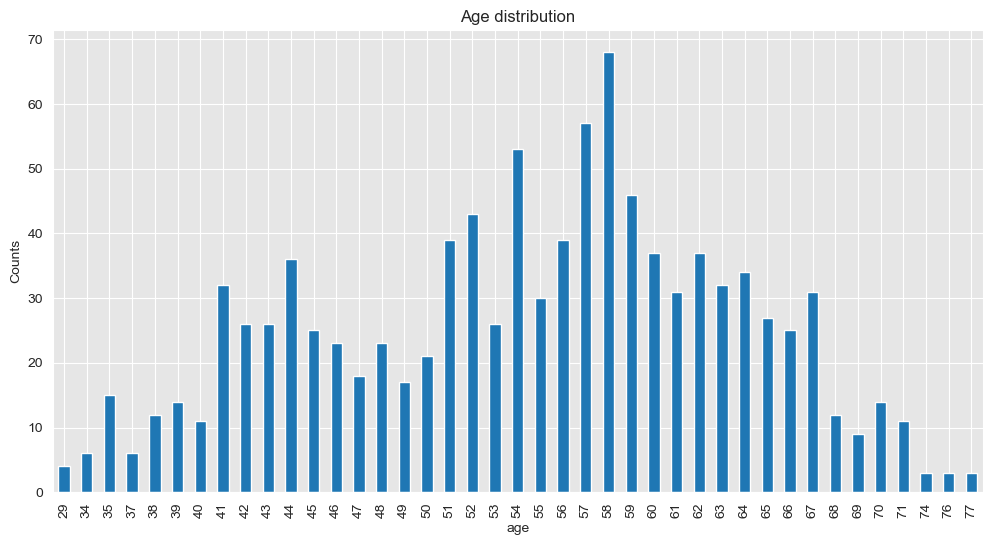

In [12]:
plt.figure(figsize=(12,6))
df.groupby(['age'])['target'].count().plot(kind='bar', ylabel='Counts', title='Age distribution');

### Age distribution for heart disease

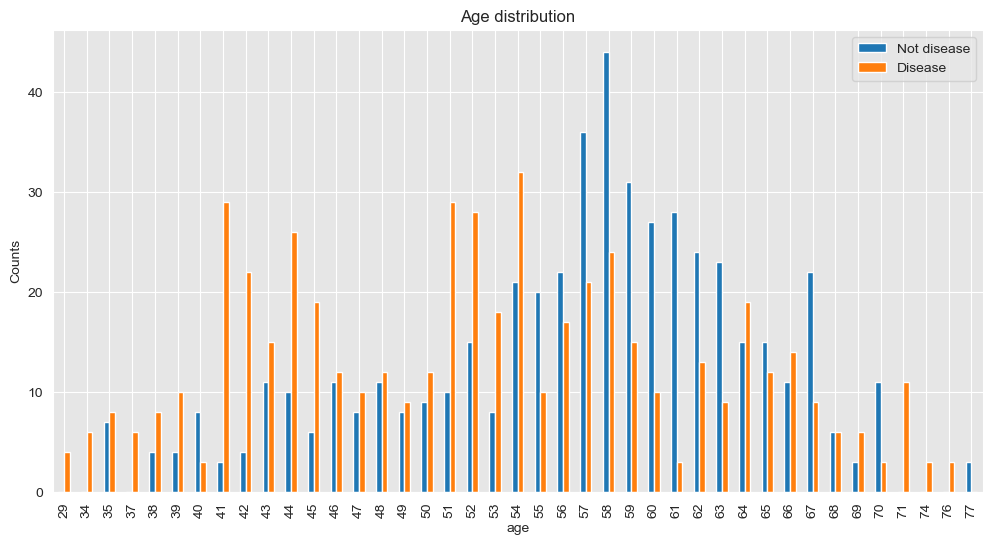

In [13]:
plt.rcParams['figure.figsize'] = [12, 6]
df.groupby(['age', 'target'])['target'].count().unstack().plot(kind='bar', ylabel="Counts", title="Age distribution")
plt.legend(["Not disease", "Disease"]);

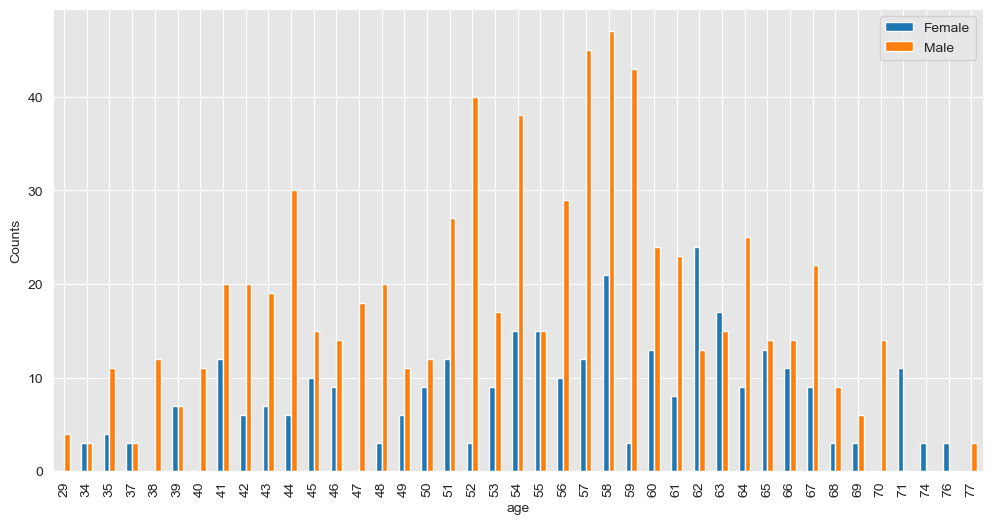

In [14]:
df.groupby(['age', 'sex'])['target'].count().unstack().plot(kind='bar', ylabel='Counts')
plt.legend(["Female", "Male"]);

### Age vs. maximum heart rate for heart disease

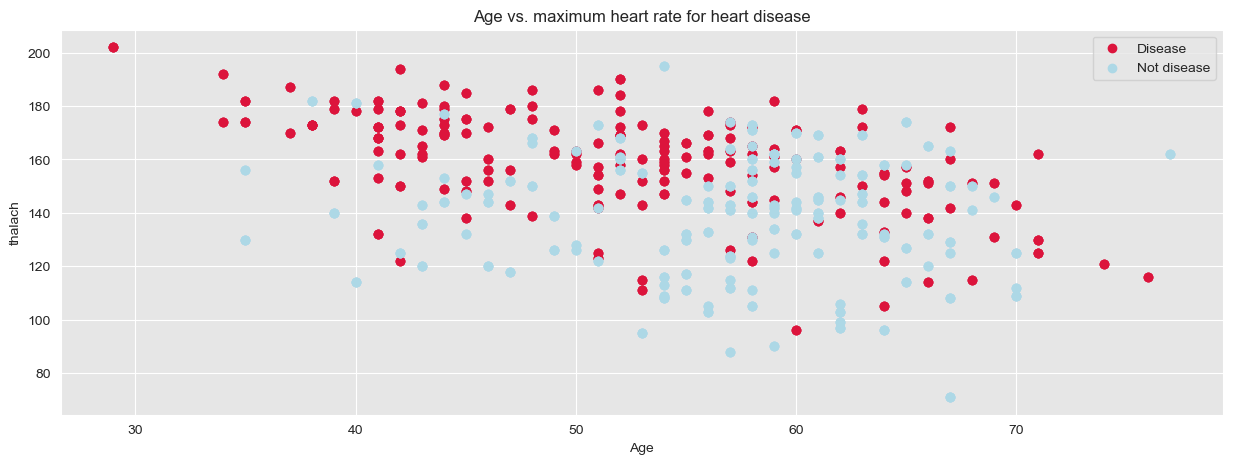

In [15]:
fig, ax = plt.subplots(figsize=(15, 5), sharex=True)

ax.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'crimson', label='Disease')
ax.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = 'lightblue', label='Not disease')
ax.set(xlabel="Age", ylabel="thalach", title="Age vs. maximum heart rate for heart disease")
ax.legend();


### Heart disease frequency per chest pain type

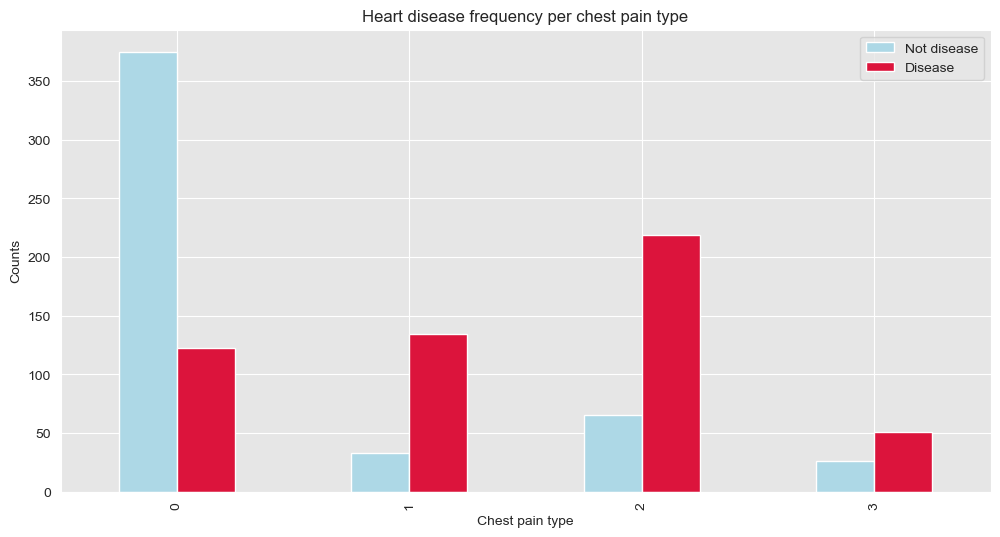

In [16]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'crimson'])
plt.ylabel('Counts')
plt.xlabel('Chest pain type')
plt.title('Heart disease frequency per chest pain type')
plt.legend(["Not disease", "Disease"]);



We can see that from cp = 1 there are more people with disase than without disease.

### Cholesterol distribution for heart disease

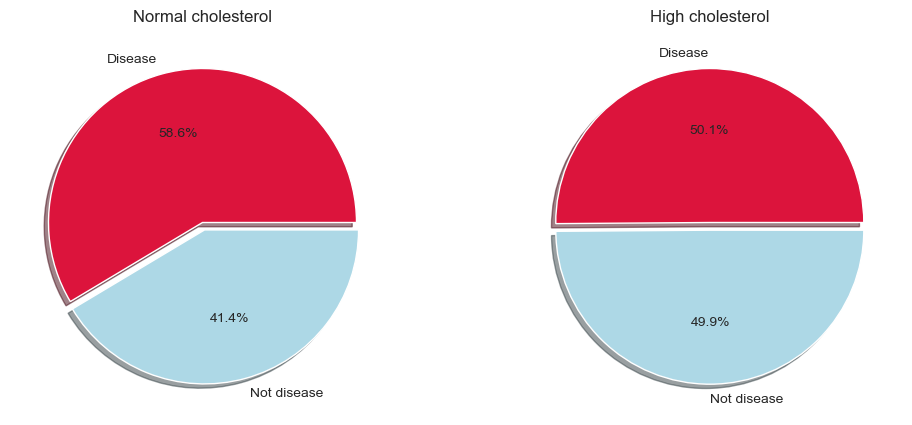

In [17]:
high_chol = df.target[df['chol'] >= 200]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.pie(x=df.target[df['chol'] < 200].value_counts(), labels=["Disease", "Not disease"],
        explode=(0, 0.05), colors=['crimson', 'lightblue'], autopct='%1.1f%%', shadow=True)
ax1.set_title('Normal cholesterol');
ax2.pie(x=df.target[df['chol'] >= 200].value_counts(), labels=["Disease", "Not disease"],
        explode=(0, 0.05), colors=['crimson', 'lightblue'], autopct='%1.1f%%', shadow=True)
ax2.set_title('High cholesterol');

In [18]:
df.target[df['chol'] < 200].value_counts()

target
1    99
0    70
Name: count, dtype: int64

In [19]:
df.target[df['chol'] >= 200].value_counts()

target
0    429
1    427
Name: count, dtype: int64

We have much more people with high cholesterol in our dataset, and inside this group half are have heart disease and half not. 

### Heart disease frequency per resting blood pressure

Resting blood pressure distribution

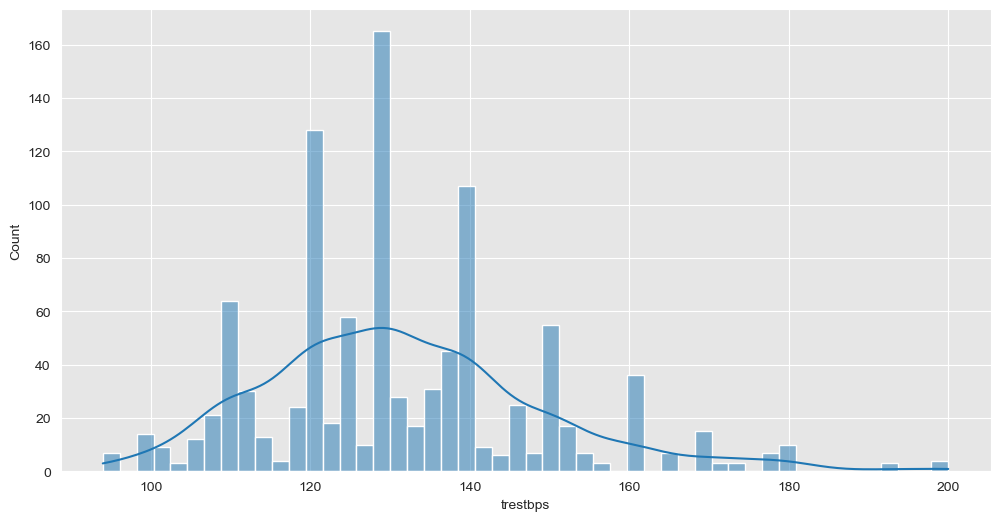

In [20]:
sns.histplot(df, x='trestbps', bins=50, kde=True);

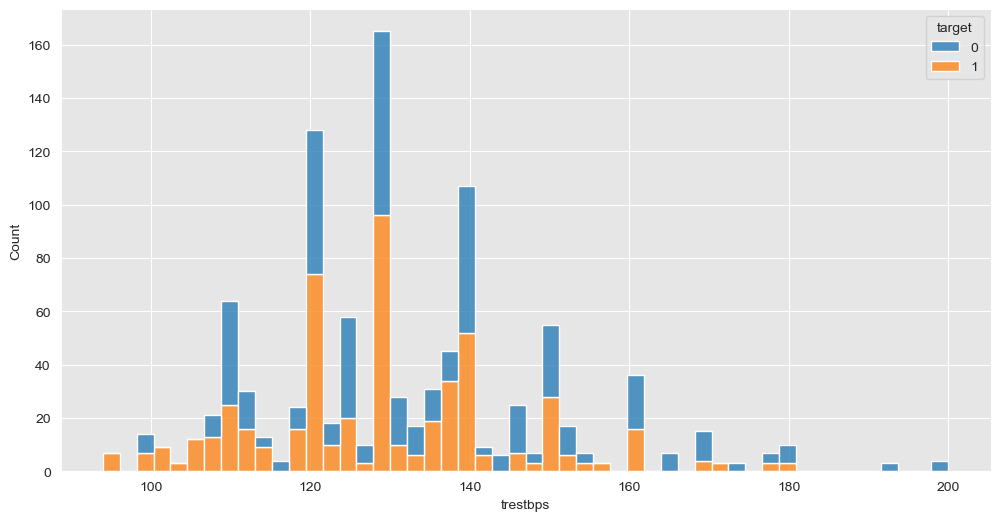

In [21]:
sns.histplot(df, x='trestbps', hue='target', bins=50, multiple='stack');

### Fasting blood sugar distribution for heart disease

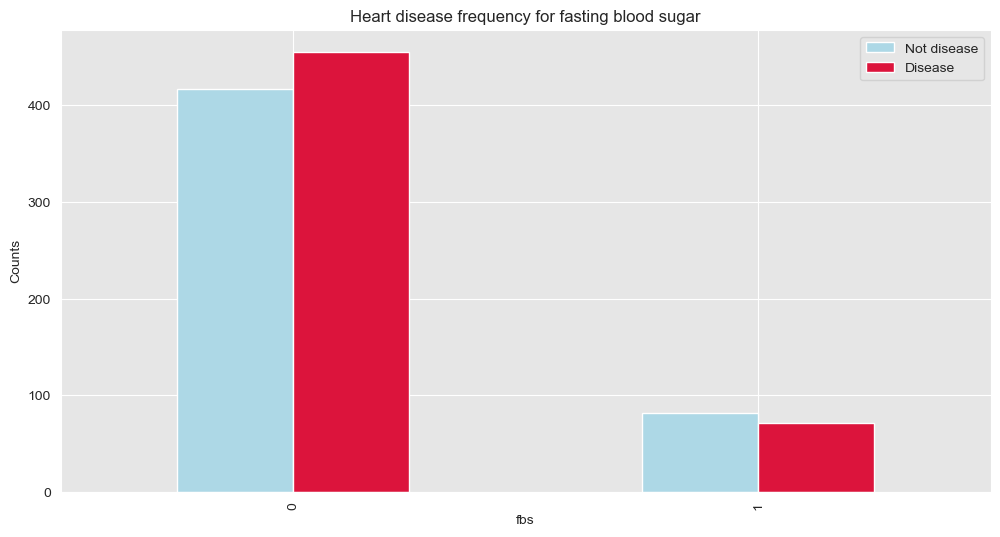

In [22]:
pd.crosstab(df['fbs'], df['target']).plot(kind="bar", color=["lightblue", "crimson"])
plt.title("Heart disease frequency for fasting blood sugar")
plt.ylabel("Counts")
plt.legend(['Not disease', 'Disease']);

### Exercise induced angina distribution for heart disease

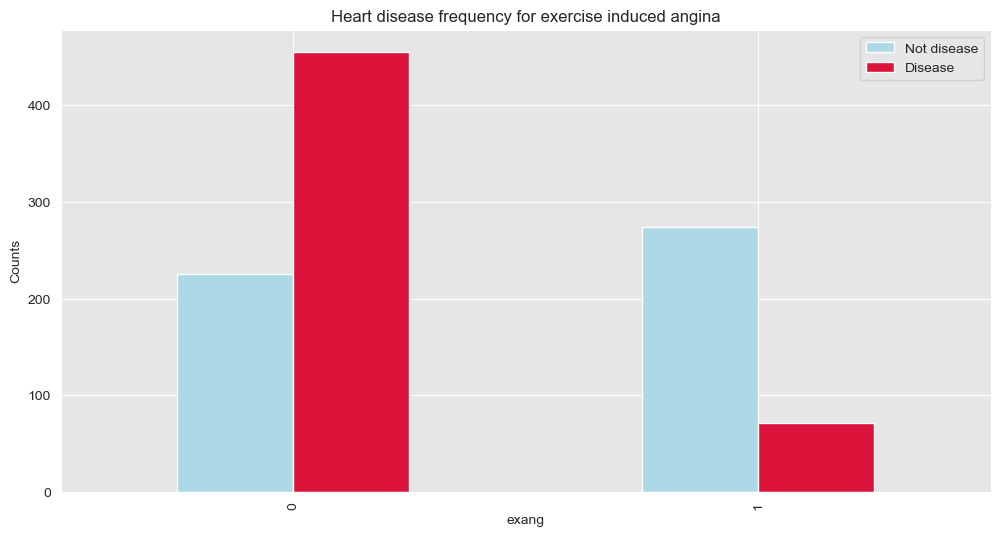

In [23]:
pd.crosstab(df['exang'], df['target']).plot(kind="bar", color=["lightblue", "crimson"])
plt.title("Heart disease frequency for exercise induced angina")
plt.ylabel("Counts")
plt.legend(['Not disease', 'Disease']);

In [24]:
df.groupby(['exang'])['target'].mean()

exang
0    0.669118
1    0.205797
Name: target, dtype: float64

### Slope distribution for heart disease

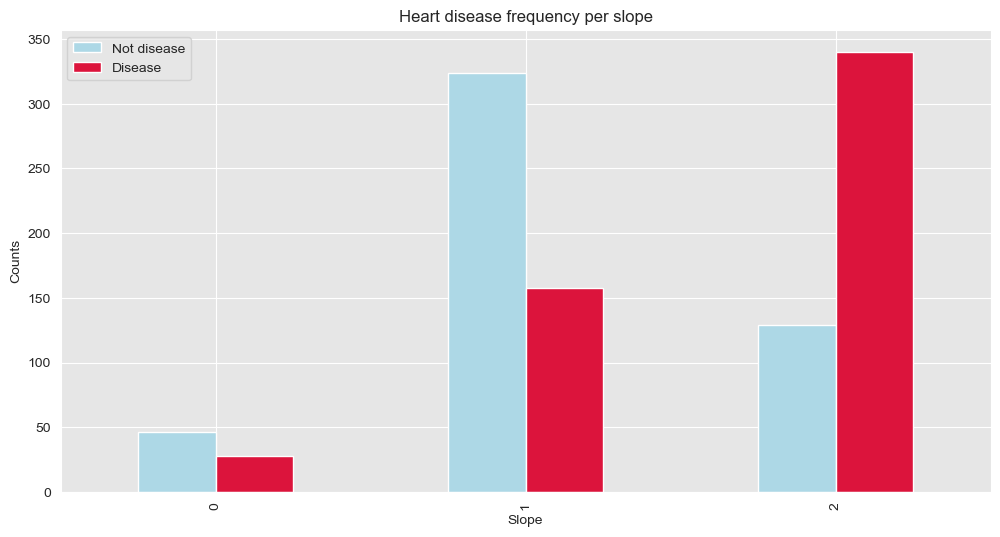

In [25]:
pd.crosstab(df['slope'], df['target']).plot(kind='bar', color=['lightblue', 'crimson'])
plt.ylabel('Counts')
plt.xlabel('Slope')
plt.title('Heart disease frequency per slope')
plt.legend(["Not disease", "Disease"]);

In [26]:
df.groupby(['slope'])['target'].mean()

slope
0    0.378378
1    0.327801
2    0.724947
Name: target, dtype: float64

### Correlation matrix

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


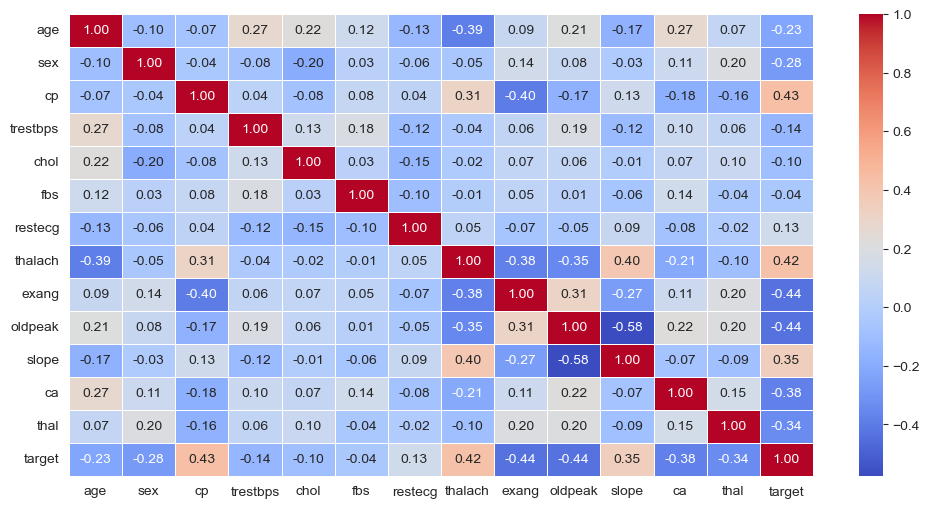

In [28]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='coolwarm');

## Modeling

In [29]:
# Spliting the data
X = df.drop('target', axis = 1)
y = df['target']

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [31]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [32]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [33]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [34]:
models = {"LogisticRegression": LogisticRegression(max_iter=2000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LogisticRegression': 0.7951219512195122,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Model comparison

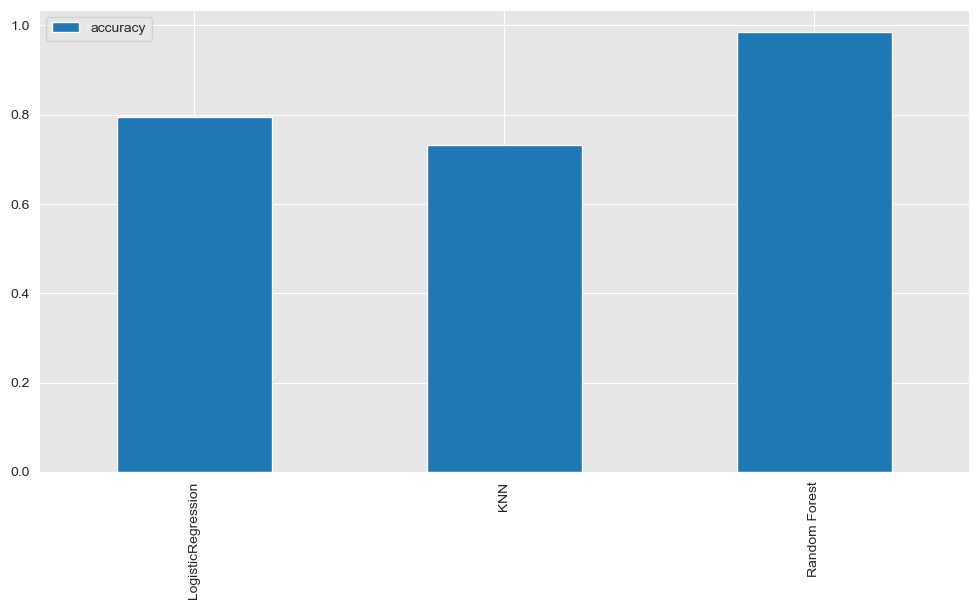

In [36]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind='bar');

### Hyperparameter tuning

In [37]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for i in neighbors:
    models["KNN"].set_params(n_neighbors = i) 
    models["KNN"].fit(X_train, y_train)
    train_scores.append(models["KNN"].score(X_train, y_train))
    test_scores.append(models["KNN"].score(X_test, y_test))

In [38]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [39]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

Maximum KNN score on the test data: 98.54%


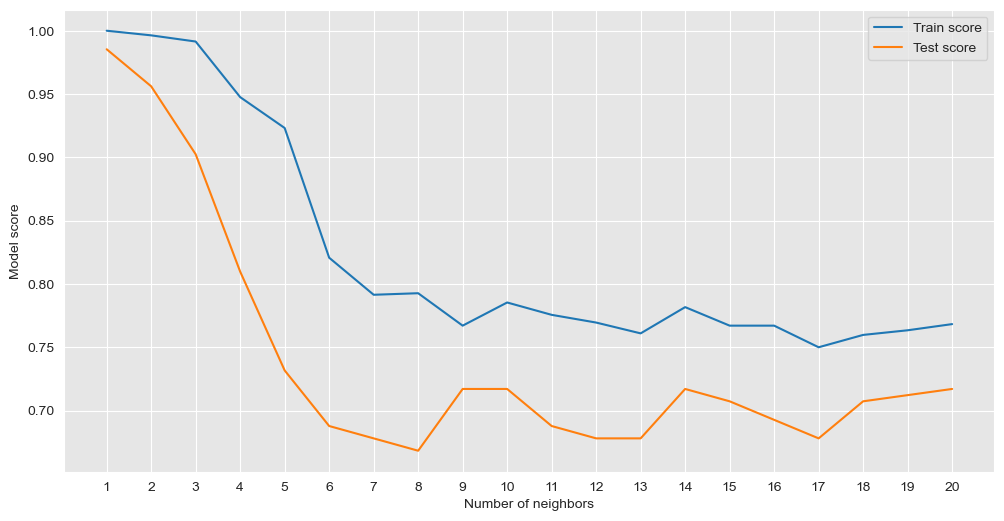

In [40]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

In [41]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "lbfgs"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(50, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [42]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=2000), param_distributions=log_reg_grid, cv=5, 
                                n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [44]:
rs_log_reg.score(X_test, y_test)

0.7951219512195122

In [45]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5,
                           n_iter=50, verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [46]:
rs_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [47]:
rs_rf.score(X_test, y_test)

0.9853658536585366

## Evaluation

In [48]:
y_preds = rs_rf.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

### ROC curve and AUC

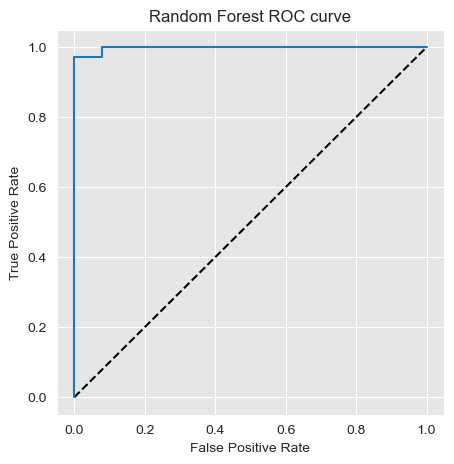

In [49]:
y_preds = rs_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [50]:
auc(fpr, tpr)

0.9977155910908053

### Confusion matrix

In [51]:
y_pred = rs_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[102   0]
 [  3 100]]


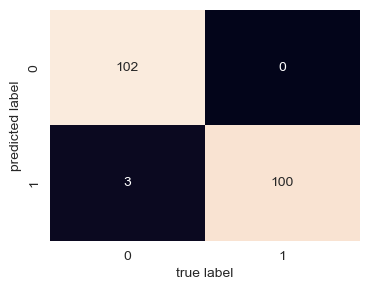

In [52]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt = ".0f")
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

### Classificstion report

In [53]:
rs_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [54]:
rf = RandomForestClassifier(n_estimators=250, min_samples_split=8, min_samples_leaf=1, max_depth=10)

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.9882926829268293

In [56]:
# Cross-validated precision
cv_precision = cross_val_score(rf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.9850986500519211

In [57]:
# Cross-validated recall
cv_recall = cross_val_score(rf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9886433063791553

In [58]:
# Cross-validated f1-score
cv_f1 = cross_val_score(rf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.9867385036919781

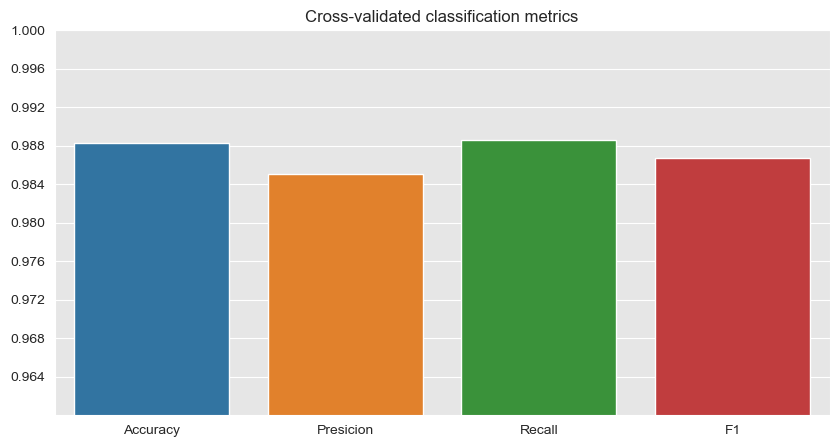

In [59]:
plt.rcParams['figure.figsize'] = [10, 5]
cv_metrics = pd.DataFrame({"Accuracy": [cv_acc],
                           "Presicion": [cv_precision],
                           "Recall": [cv_recall],
                           "F1": [cv_f1]})

ax = sns.barplot(data=cv_metrics)
ax.set(title='Cross-validated classification metrics', ylim=(0.960, 1.0), 
       yticks=np.arange(0.964,1.00,0.004));

### Feature importance

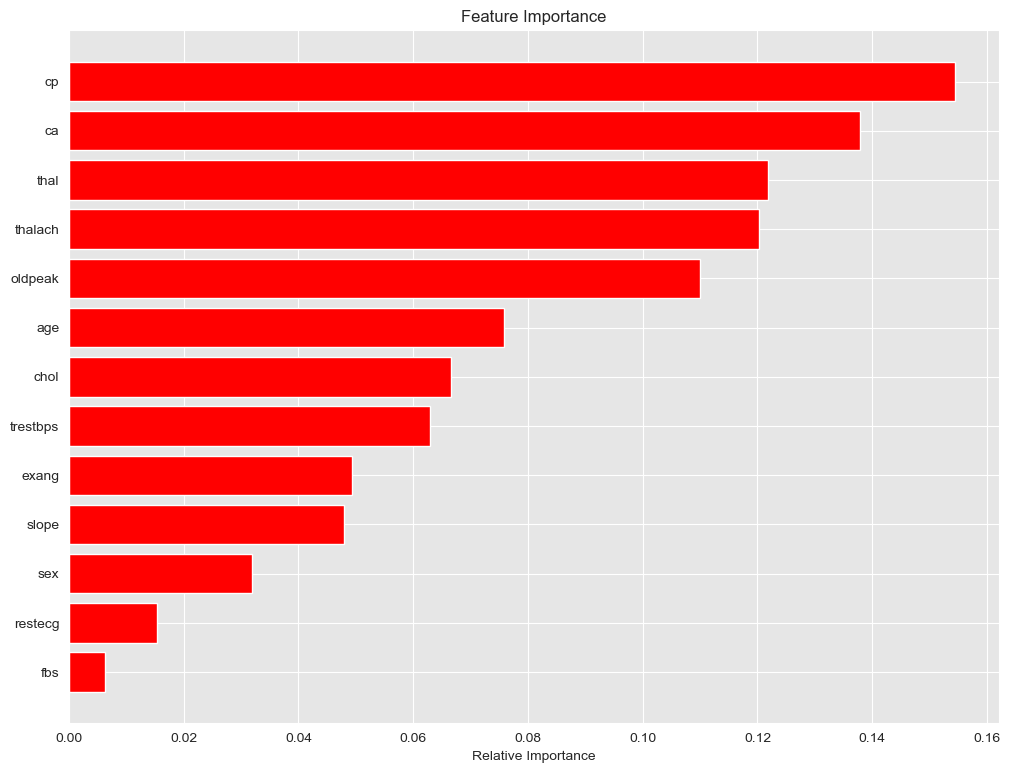

In [60]:
rf.fit(X_train, y_train)
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

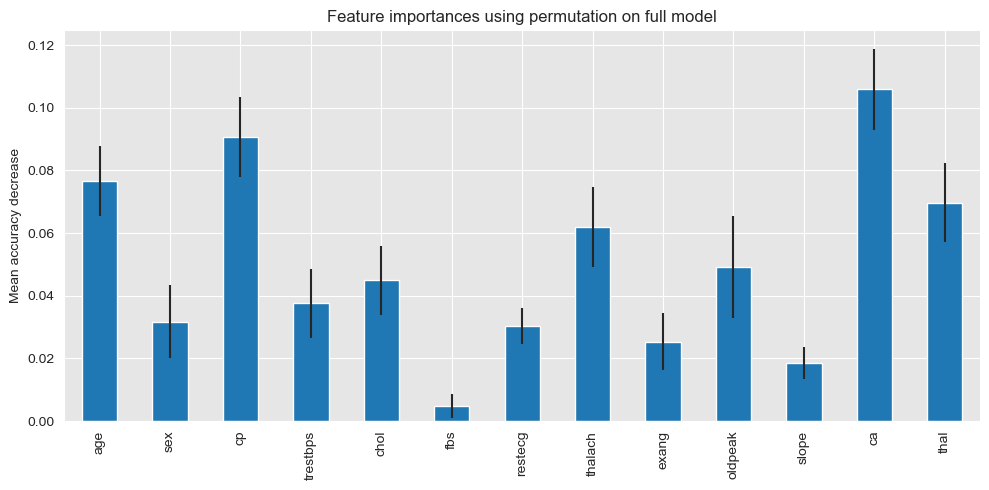

In [61]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()